In [1]:
set_matplotlib_formats('svg')

## 坐标变换和注释

为图表添加各种注释元素: 文字, 箭头, 标注;  

ax.fill_between(x,y1,y2,where=None): 填充两个水平曲线之间的面积;  
* `x, y1, y2, where`: 即使是一个标量, 也应当被认为是一个长度为N的数组;  
* `where`: 
    * None, 对数组x中的所有元素进行填充; 
    * 如果where是一个布尔数组, 只填充True所对应的部分

In [2]:
matplotlib.rcdefaults()

In [3]:
def func1(x): 
    return 0.6*x + 0.3
def func2(x): 
    return 0.4*x*x + 0.1*x + 0.2
def find_curve_intersects(x, y1, y2):
    d = y1 - y2 #
    idx = np.where(d[:-1]*d[1:]<=0)[0] # 第一个变号点
    x1, x2 = x[idx], x[idx+1] 
    d1, d2 = d[idx], d[idx+1]
    return -d1*(x2-x1)/(d2-d1) + x1

x = np.linspace(-3,3,100) 
f1 = func1(x)
f2 = func2(x)
x1, x2 = find_curve_intersects(x, f1, f2) 

In [4]:
%clf
fig, ax = plt.subplots(figsize=(8,4))
# 两条曲线
ax.plot(x, f1)
ax.plot(x, f2)
# 交点
ax.plot(x1, func1(x1), "o") 
ax.plot(x2, func1(x2), "o")

# x轴上两个交点之间, y轴上两个曲线之间的面积
ax.fill_between(x, f1, f2, where=f1 > f2, facecolor="green", alpha=0.5) 

from matplotlib import transforms
# 创建混合坐标系: X轴使用数据坐标系, Y轴使用子图坐标系
trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between([x1, x2], 0, 1, transform=trans, alpha=0.1) #

# 在图表中添加说明文字
a = ax.text(0.05, 0.95, "直线和二次曲线的交点", 
            transform = ax.transAxes,
            verticalalignment = "top",
            fontdict = {'fontname': 'simhei', 'fontsize': 16},
            bbox={"facecolor":"red","alpha":0.4,"pad":8}
            )
# 带箭头的注释
arrow = {"arrowstyle": "fancy,tail_width=0.6", 
         "facecolor": "gray", 
         "connectionstyle": "arc3,rad=-0.3"}
# 指向第一个交点的箭头
ax.annotate("交点", 
    xy=(x1, func1(x1)), xycoords="data",
    xytext=(0.05, 0.5), textcoords="axes fraction",
    fontname= 'simhei', fontsize= 12,
    arrowprops = arrow)
# 指向第二个交点的箭头
ax.annotate(" "*4, 
    xy=(x2, func1(x2)), xycoords="data",
    xytext=(0.05, 0.5), textcoords="axes fraction",
    fontname= 'simhei', fontsize= 12,
    arrowprops = arrow)
# 相交区域
xm = (x1+x2)/2
ym = (func1(xm) - func2(xm))/2+func2(xm)
o = ax.annotate("直线大于曲线区域", 
    xy =(xm, ym), xycoords="data",
    xytext = (30, -30), textcoords="offset points",    
    # bbox={"boxstyle":"round", "facecolor":(1.0, 0.7, 0.7), "edgecolor":"none"},
    fontname= 'simhei', fontsize= 12,
    arrowprops={"arrowstyle":"->"})
plt.xlim(-3,3); plt.ylim(-2,5);

### 四种坐标系

matplotlib有**四种坐标系**:

1. 数据坐标系: ,描述数据空间位置的坐标系, X(-3,3), Y(-2,5)
2. 子图坐标系: 描述子图位置的坐标系, 子图的左下标为(0,0), 右上标为(1,1)
3. 图表坐标系: 描述子图之间的相对位置, 子图与画布之间的空白等, 左下为00, 右上为11;
4. 窗口坐标系(像素坐标系): 
    * 绘图窗口中以像素为单位的坐标系, 左下标为00, 右上标为(width,height);
    * 窗口是不包含标题栏, 工具条以及状态栏的部分

**坐标变换对象**: 描述坐标系, 以及坐标系转换的对象

* ax.transData: 数据坐标变换对象;
* ax.transAxes: 子图坐标变换对象;
* fig.transFigure: 图表坐标变换对象;

示例2

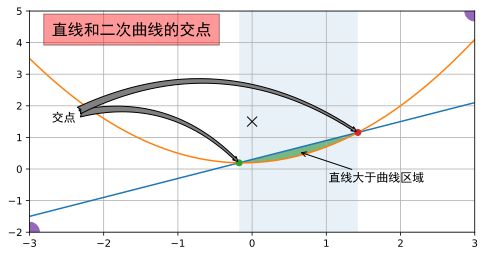

In [5]:
ax.plot([-3,3],[-2,5],'o', ms=20)
ax.plot(0,1.5,'kx', ms=10)  # 数据坐标系的中心
ax.grid(True)
fig

In [6]:
#将数据坐标点(-3,-2)和(3,5)转化为窗口坐标点
ax.transData.transform([(-3, -2),
                        ( 3, 5)])

array([[100.,  44.],
       [720., 352.]])

In [7]:
# 计算子图坐标点(0,0),(1,1)在窗口坐标中对应的点;  
ax.transAxes.transform([(0, 0),
                        (1, 1)])

array([[100.,  44.],
       [720., 352.]])

In [8]:
# 计算图表坐标点(0,0),(1,1)在窗口坐标中对应的点;  
# figsize(4,2)的单位是英寸, 该处一英寸表示100个像素点;
fig.transFigure.transform([(0, 0),
                           (1, 1)])

array([[  0.,   0.],
       [800., 400.]])

将窗口坐标中心(400,200)表示为数据坐标, 可知窗口窗口坐标系的中心并不是数据区域的中心, 这是因为子图的的左右余白不同导致的;

In [9]:
inv = ax.transData.inverted()
inv.transform((400,200))

array([-0.09677419,  1.54545455])

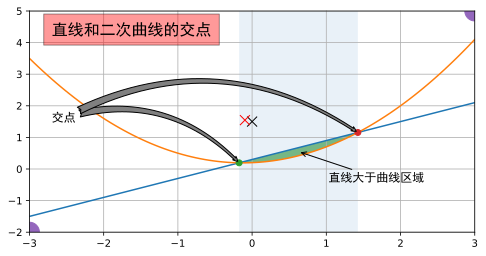

In [10]:
ax.plot(-0.09677419,  1.54545455, 'rx', ms=10)
fig

修改子图所显示的X轴范围, 数据坐标变换对象也会同时发生变化(在窗口坐标系中对应的位置发生变化);  
在这个过程中, 不变的量是figure的大小;

 1: [3820.  352.],    


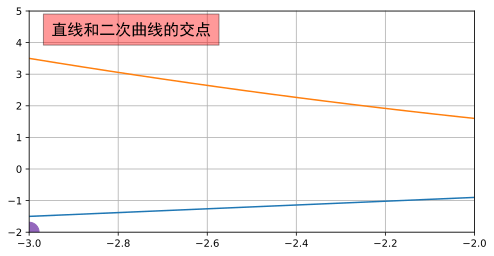

In [11]:
ax.set_xlim(-3, -2)
%P ax.transData.transform((3, 5)) # 原[720., 352.], 将[-3,2]之间的数据拉伸到适合窗口大小
fig

绘制蓝色区域的坐标: 左右两边经过两个交点 -> X轴必须使用数据坐标系; 高度充满整个子图的高度 -> Y轴必须使用子图坐标系; 
* 可以使用`axvspan()`和`axhspan()`可以快速绘制垂直方向和水平方向上的区间;  
* `matplotlib.transforms.blended_transform_factory(x_transform,y_transform)`: 创建一个混合类型的坐标变换对象, 可以使X轴和Y轴使用不同的坐标系;

坐标变换对象的`transform()`方法, 可以将当前坐标系下的坐标(前3类)转化为窗口坐标系中的坐标(像素);  

In [12]:
# 将相对坐标系都转化到窗口坐标系
lst = [(0,0), (.5,.5), (1,1), (-2,3)] 
data2window = ax.transData.transform(lst)      # 数据坐标系->窗口坐标系
axes2window = ax.transAxes.transform(lst)      # 子图坐标系->窗口坐标系
figure2window = fig.transFigure.transform(lst) # 图表坐标系->窗口坐标系
%C 5 lst; data2window; axes2window; figure2window

     lst            data2window           axes2window           figure2window   
-------------     ----------------     ------------------     ------------------
[[ 0.   0. ]      [[1960.,  132.],     [[  100.,    44.],     [[    0.,     0.],
 [ 0.5  0.5]       [2270.,  154.],      [  410.,   198.],      [  400.,   200.],
 [ 1.   1. ]       [2580.,  176.],      [  720.,   352.],      [  800.,   400.],
 [-2.   3. ]]      [ 720.,  264.]]      [-1140.,   968.]]      [-1600.,  1200.]]


坐标变换对象的`inverted()`方法, 创建反变换对象, 可以实现窗口坐标系到到三种相对坐标系的变换;

In [13]:
# 将窗口坐标系转化到各种相对坐标系
window2data = ax.transData.inverted().transform(data2window)
window2axes= ax.transAxes.inverted().transform(axes2window)
window2fig= fig.transFigure.inverted().transform(figure2window)
%C 5 window2data; window2axes; window2fig

 window2data        window2axes         window2fig  
--------------     --------------     --------------
[[ 0. ,  0. ],     [[ 0. ,  0. ],     [[ 0. ,  0. ],
 [ 0.5,  0.5],      [ 0.5,  0.5],      [ 0.5,  0.5],
 [ 1. ,  1. ],      [ 1. ,  1. ],      [ 1. ,  1. ],
 [-2. ,  3. ]]      [-2. ,  3. ]]      [-2. ,  3. ]]


In [14]:
kk 1

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>!kk1:active>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


### 坐标变换的流水线

本节问题:
1. 坐标变换是如何进行的;
2. 笛卡尔坐标, 极坐标, 对数坐标的实现;

#### 图表坐标变换对象的内部结构:    

* **Bbox**: 以英寸为单位的图表对象(矩形区域), figsize参数;  
* **Affine2D**: 变换矩阵, 数值表示像素数/英寸(fig.dpi), 可以将以英寸为单位的矩形区域, 变换为以像素为单位的矩形区域;  
* **TransformedBbox**: 其`_points`, 以像素为单位的矩形区域;
* **BboxTransformTo**: 其`_mtx`属性是一个变换矩阵, 将图表坐标系中的点转化为窗口坐标系中的对应点;

!data/transFigure.dot>


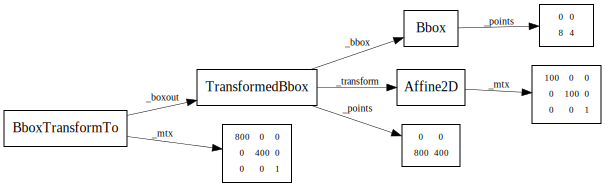

In [15]:
from common import GraphvizMPLTransform
GraphvizMPLTransform.graphviz(fig.transFigure, 'data/transFigure.dot')
dot2graph('data/transFigure.dot')

In [16]:
points = np.array([[0, 0],
                    [2, 1]])
mtx = np.array([[100,0,0], [0,100,0]]) #变换矩阵最后一行永远是[0,0,1], 可以写成shape(2,3)
points2 = np.dot(points, mtx)
%C 5 points; mtx; points2

 points             mtx                 points2     
--------     -----------------     -----------------
[[0, 0],     [[100,   0,   0],     [[  0,   0,   0],
 [2, 1]]      [  0, 100,   0]]      [200, 100,   0]]


In [17]:
# 以英寸为单位的图表大小
%C fig.transFigure._boxout._bbox._points; fig.get_size_inches()

fig.transFigure._boxout._bbox._points  fig.get_size_inches()
-------------------------------------  ---------------------
[[0., 0.],                             [8., 4.]             
 [8., 4.]]                                                  


In [18]:
#由英寸为单位的图形对象->以像素为单位的图形对象: 变换矩阵  
%C 5 fig.transFigure._boxout._transform; fig.dpi_scale_trans; fig.get_dpi()

fig.transFigure._boxout._transform     fig.dpi_scale_trans     fig.get_dpi()
----------------------------------     -------------------     -------------
[[100.   0.   0.]                      [[100.   0.   0.]       100.0        
 [  0. 100.   0.]                       [  0. 100.   0.]                    
 [  0.   0.   1.]]                      [  0.   0.   1.]]                   


#### 子图坐标变换对象的内部结构

!data/transAxes.dot>


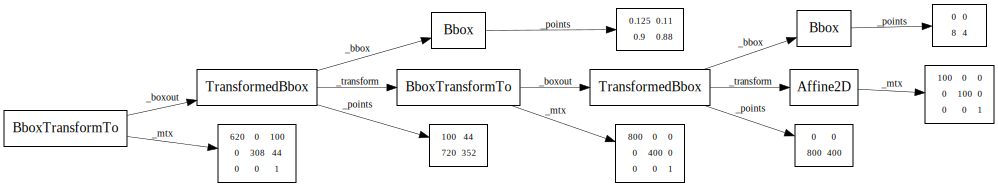

In [19]:
GraphvizMPLTransform.graphviz(ax.transAxes, 'data/transAxes.dot')
dot2graph('data/transAxes.dot')

* ax.transAxes是一个BboxTransformTo对象, 并且在其内部又包含了一个BboxTransformTo对象(实现图形坐标向窗口坐标的变换);  
* points`[[0.125, 0.11], [0.9, 0.88]]`表示子图在图表坐标系中的位置;  
* mtx`[[155,0,25],[0,77,11],[0,0,1]]`表示变换矩阵, 将子图坐标变换为窗口坐标;

In [20]:
points = np.array(ax.get_position())
mtx = np.array([[200, 0,   0], 
                [0,   100, 0]])
points2 = points.dot(mtx)
%C 5 points; mtx; points2

    points                mtx                  points2       
--------------     -----------------     --------------------
[[0.12, 0.11],     [[200,   0,   0],     [[ 25.,  11.,   0.],
 [0.9 , 0.88]]      [  0, 100,   0]]      [180.,  88.,   0.]]


#### 数据坐标变换对象的内部结构

ax.transData()内部结构: 
* ax.transScale
* ax.transLimits
* ax.transAxes

ax.transLimits的内部结构

!data/transLimits.dot>


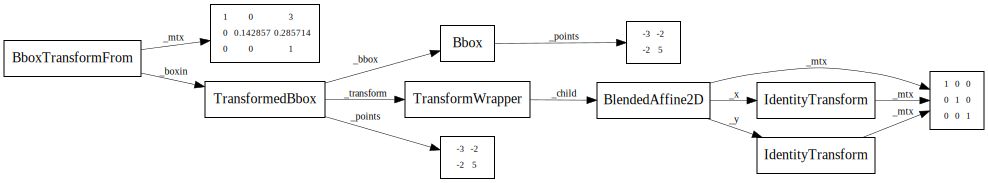

In [21]:
GraphvizMPLTransform.graphviz(ax.transLimits, 'data/transLimits.dot')
dot2graph('data/transLimits.dot')

由于本例中的X轴的取值范围是`(-3,3)`，因此如果将X轴改为对数坐标，并且重新绘图，会产生很多错误信息。

In [ ]:
# X轴为对数坐标时的transScale对象的内部结构
ax.set_xscale("log") # 将X轴改为对数坐标
fig_to_dot = GraphvizMPLTransform.graphviz(ax.transScale)

In [24]:
ax.set_xscale("linear") # 将X轴改为线性坐标

In [25]:
kk 1

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>!kk1:active>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


### 制作阴影效果

In [ ]:
#%fig=使用坐标变换绘制的带阴影的曲线
fig, ax = plt.subplots()
x = np.arange(0., 2., 0.01)
y = np.sin(2*np.pi*x)

N = 7 # 阴影的条数
for i in xrange(N, 0, -1):
    offset = transforms.ScaledTranslation(i, -i, transforms.IdentityTransform()) #❶
    shadow_trans = plt.gca().transData + offset #❷
    ax.plot(x,y,linewidth=4,color="black", 
        transform=shadow_trans,  #❸
        alpha=(N-i)/2.0/N)
    
ax.plot(x,y,linewidth=4,color='black')    
ax.set_ylim((-1.5, 1.5));

In [ ]:
offset.transform((0,0)) # 将(0,0)变换为(1,-1)

In [ ]:
%P ax.transData.transform((0,0)) # 对(0,0)进行数据坐标变换
%P shadow_trans.transform((0,0)) # 对(0,0)进行数据坐标变换和偏移变换

### 添加注释

In [ ]:
#%fig=三个坐标系中的文字
x = np.linspace(-1,1,11)
y = x**2

fig, ax = plt.subplots(figsize=(4,2))
ax.plot(x,y)

for i, (_x, _y) in enumerate(zip(x, y)):
    ax.text(_x, _y, str(i), color="red", fontsize=i+10) 

ax.text(0.5, 0.8, u"transAxes's Text", color="blue", ha="center", 
    transform=ax.transAxes) 
    
plt.figtext(0.1, 0.92, u"transFigure's Text", color="green") #❸;

plt.show()